In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

#dict(list(boston.items())[0:1])



In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = boston.data
X.shape

(506, 13)

In [5]:
y = boston.target
y.shape

(506,)

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=9)

We instantiate the linear regression

In [16]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [17]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [18]:
X_test.shape, y_test.shape

((152, 13), (152,))

We fit the training data to a linear model

In [19]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We use the model to predict the test data

In [25]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [26]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

29.263093755600256


Let us use sklearn metrics next

In [27]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

29.263093755600256


What is the error on the training data

In [28]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

19.326991475801634


In [19]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [29]:
LinReg.score(X_test, y_test)

0.68054769540987

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([ 4., 31., 65., 29., 16.,  2.,  2.,  0.,  0.,  3.]),
 array([-10.13847652,  -6.3814803 ,  -2.62448409,   1.13251213,
          4.88950835,   8.64650457,  12.40350079,  16.160497  ,
         19.91749322,  23.67448944,  27.43148566]),
 <a list of 10 Patch objects>)

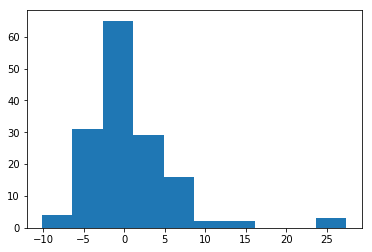

In [30]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

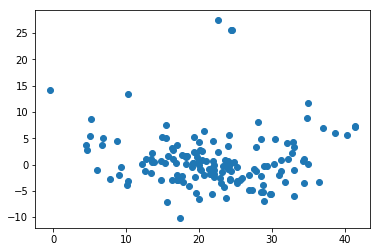

In [31]:
plt.scatter(y_predicted, y_test - y_predicted)

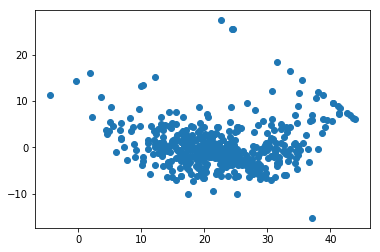

In [32]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

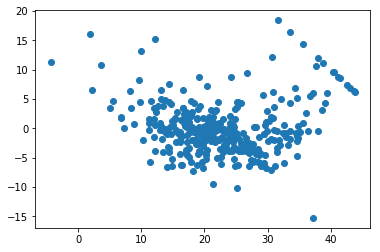

In [33]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [37]:
print(LinReg.coef_)


[-1.02571750e-01  3.17420886e-02  9.35840871e-02  2.13493913e+00
 -2.06965416e+01  4.24906350e+00  1.30243596e-02 -1.19766655e+00
  2.80629150e-01 -1.12780097e-02 -1.13241905e+00  7.01026339e-03
 -5.08999219e-01]


In [38]:
print(LinReg.intercept_)

36.289951301482766


In [39]:
from sklearn.neural_network import MLPRegressor

In [40]:
nn_reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2,2), random_state=1)

In [41]:
nn_reg.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
y_pred_nn = nn_reg.predict(X_test)

In [43]:
np.mean( (y_test - y_pred_nn) **2 )

91.72906356955279

In [44]:
np.mean( (y_train - nn_reg.predict(X_train)) **2 )

81.29714800983189

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred_nn)

6.957091780630741

In [46]:
mean_absolute_error(y_train, nn_reg.predict(X_train))

6.488981299745111

In [47]:
r2_score(y_test, y_pred_nn)

-0.0013657817564236563